# Decison Trees

Car purchase dataset taken from Kaggle. There are 4 features that we will be using in total. 

In [1]:
import numpy as np                              #Numpy is used for working with arrays
import pandas as pd                             #Pandas is used for working with data sets
from sklearn import tree                        #The decision tree inport comes from sklearn - it is generally used for modelling and predictive analytics
import io                                       #This is needed for the file upload function and is used for file related reading and writing options

from google.colab import files                  #This line of code and the below lines are needed to import a file that is stored on the local drive
uploaded = files.upload()
car_df = pd.read_csv(io.BytesIO(uploaded['car_data.csv']), header = 0) #The io.BytesIO optimises the dataset to work faster as it is now stored in RAM. Also it enables the uploaded file which is stored in a variable to be used as a file object

Saving car_data.csv to car_data.csv


In [2]:
car_df.head(5)            # Display the first five lines of the dataset to ensure the upload worked correctly and to check the feature names and content

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


As the decision tree needs all data to be shown in numerical format we will need to map the feature "Gender" to numerical values. 1 is used for male and 0 for female

In [3]:
gender = {'Male': 1, 'Female': 0}                         # Gender variable is declared as a dictionary with "Male" assigned the value 1 and "Female" assigned the value 0
car_df['Gender'] = car_df['Gender'].map(gender)           # The current values of the "Gender" feature are now mapped to the above dictionary values. 1 instead of "Male" and 0 for "Female"

car_df.head()                                             # Display a sample of 5 rows of the data again to see if the above worked correctly

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,1,35,20000,0
1,681,1,40,43500,0
2,353,1,49,74000,0
3,895,1,40,107500,1
4,661,1,25,79000,0


Below we need to separate out all of the x values for the decision tree. The x values will be the independant variables and are "Gender", "Age" and "Annual Salary". Obviously the feature "User ID" will not be included as this will have no bearing on the outcome of the dependant variable y and is just used as a unique identifier for the data set.

In [4]:
features = list(car_df.columns[1:4]) # The "features" variable is assigned the of columns Gender, Age and AnnualSalary. The count in starts at 0 which is why 1=Gender and not "User ID"
features                             # Returns the below list which confirms we have the correct variables to continue

['Gender', 'Age', 'AnnualSalary']

Below the y variable is the outcome and is dependant on the x variables. The decision tree is constructed at this stage also.


In [19]:
from sklearn.model_selection import train_test_split # used to split the data into training and testing
from sklearn.metrics import accuracy_score           # used to check the accuracy of the model on the test data

y = car_df["Purchased"]                               # The y variable is assinged the values of the "Purchased" feature    
X = car_df[features]                                  # The x variable is assinged the values of the "Gender", "Age", and "AnnualSalary" features 
model = tree.DecisionTreeClassifier()                   # Decision tree classifier declared and assigned to model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) # This code splits the data into training data (80%) for training the model, and testing data (20%) for testing accuracy after training

model = model.fit(X_train, y_train)                                    # The x and y variables are now fitted together and the values assinged to model

y_predicted = model.predict(X_test)                                    # The y_predicted value is the label output of the x input. The x input value is not part of the training data in order to ensure test accuracy of the tree, so as to prevent memorisation of results 
accuracy = accuracy_score(y_test, y_predicted)
accuracy


0.895

... and display it. Note you need to have pyplot2 installed for this to work.

To read this decision tree, each condition branches left for "true" and right for "false". When you end up at a value, the value array represents how many samples exist in each target value. So value = [0. 5.] mean there are 0 "no hires" and 5 "hires" by the tim we get to that point. value = [3. 0.] means 3 no-hires and 0 hires.

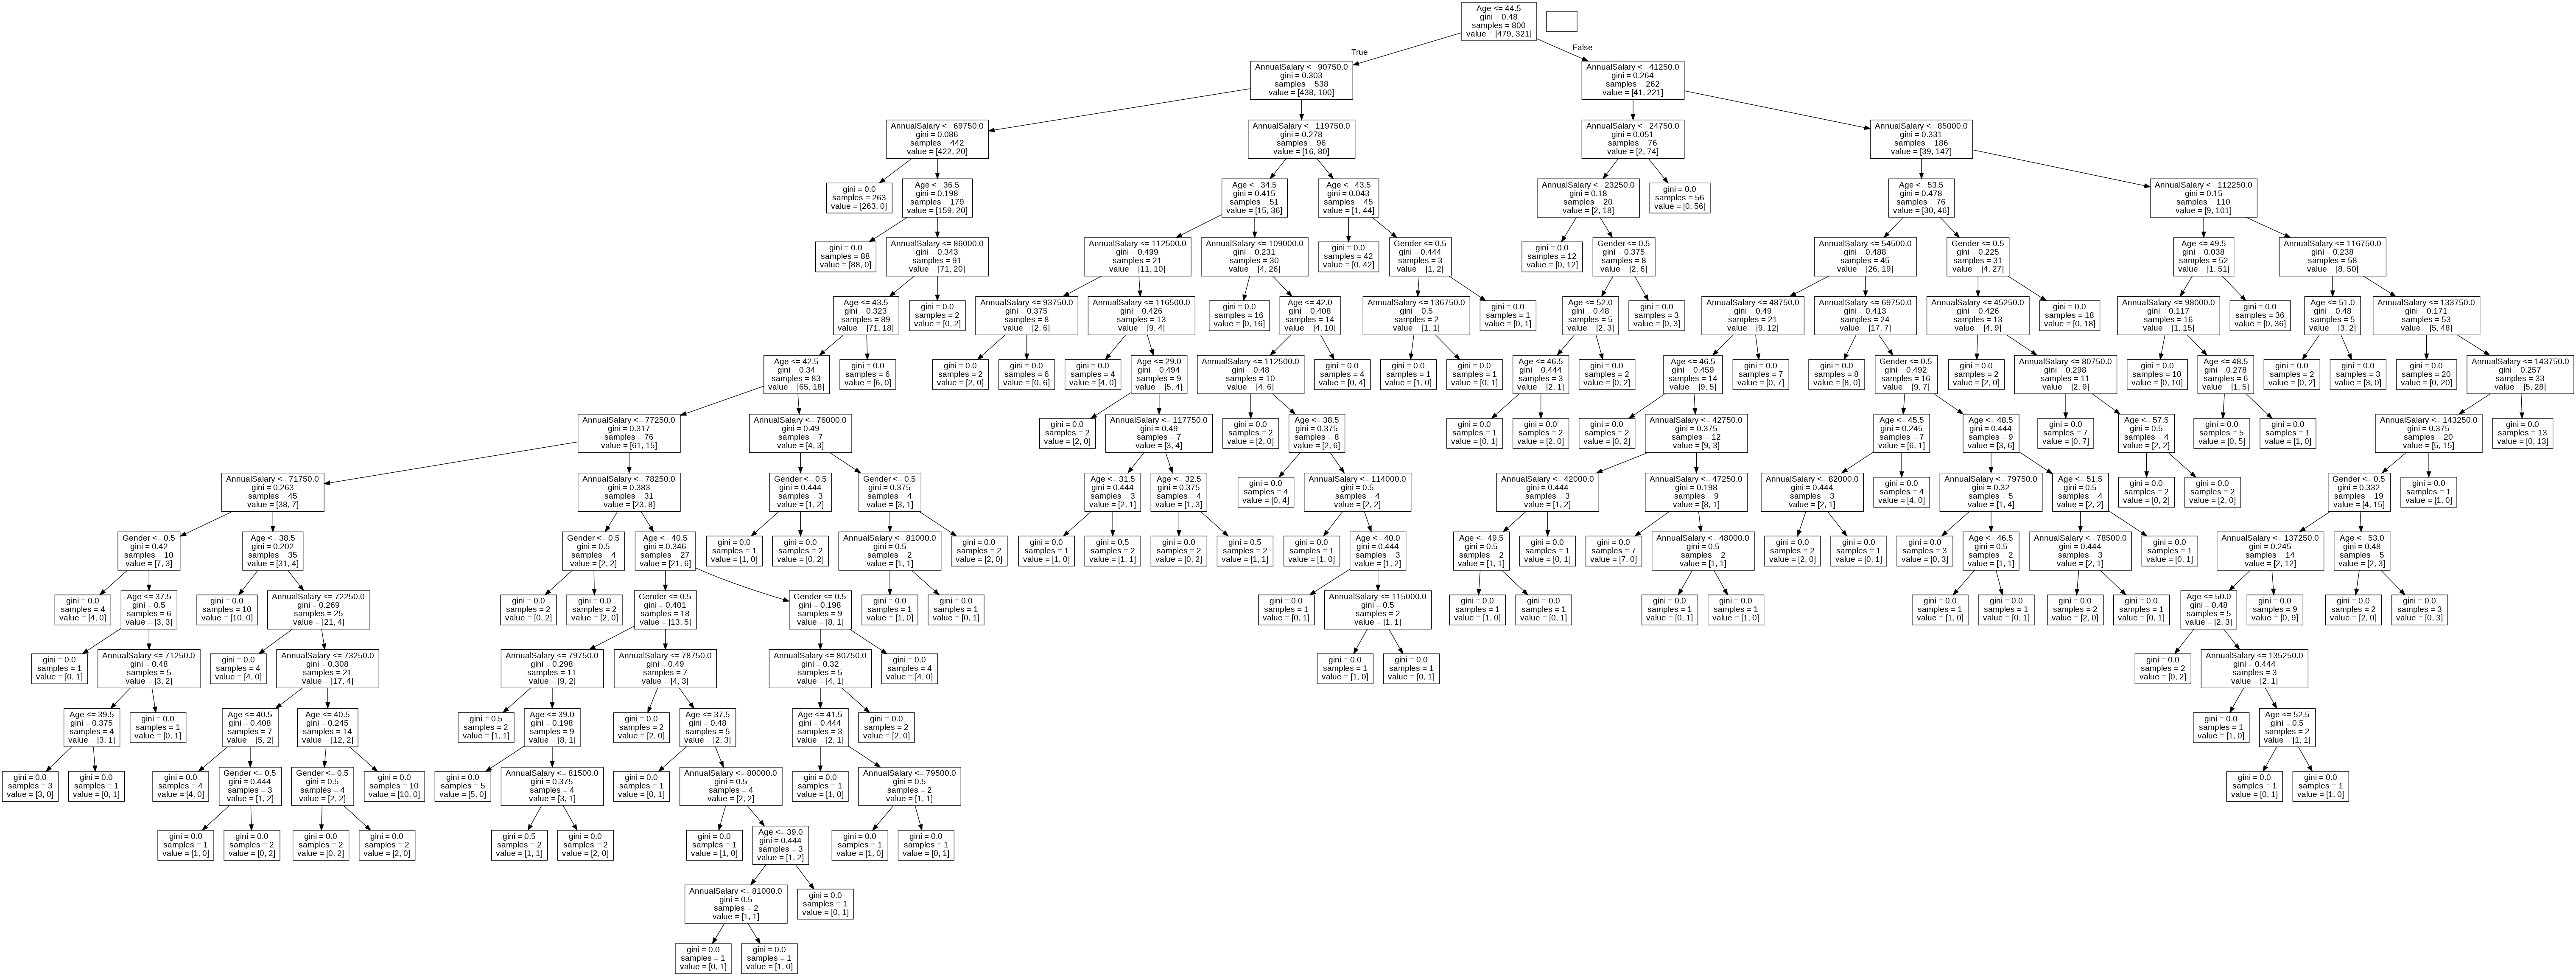

In [20]:
from IPython.display import Image  
from six import StringIO
import pydot

dot_data = StringIO()  

tree.export_graphviz(model, out_file=dot_data, feature_names=features)   # From sklearn library - used to export a decision tree graph in dot format. The parameters are as follows: 1) The decision tree. 2) Name of the output file, i.e., "dot_data". 3) Names of each feature.
                                                                       # Returns a string representation of the input tree in GraphViz dot format   
                                                                      
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())  

## Ensemble learning: using a random forest

We'll use a random forest of 1000 decision trees to predict employment of specific candidate profiles:

In [23]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000)
model = model.fit(X_test, y_test)
print(model.predict([[1, 35, 70000]]))
print(model.predict([[1, 40, 107500]]))

[1]
[1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


## Activity

Modify the test data to create an alternate universe where everyone I hire everyone I normally wouldn't have, and vice versa. Compare the resulting decision tree to the one from the original data.